# USGS dataretrieval Python Package `get_iv()` Examples

This notebook provides examples of using the Python dataretrieval package to retrieve instantaneous values data for a United States Geological Survey (USGS) monitoring site. The dataretrieval package provides a collection of functions to get data from the USGS National Water Information System (NWIS) and other online sources of hydrology and water quality data, including the United States Environmental Protection Agency (USEPA).

### Install the Package

Use the following code to install the package if it doesn't exist already within your Jupyter Python environment.

In [1]:
!pip install dataretrieval

Defaulting to user installation because normal site-packages is not writeable


Load the package so you can use it along with other packages used in this notebook.

In [2]:
from dataretrieval import nwis
from IPython.display import display
from datetime import date

### Basic Usage

The dataretrieval package has several functions that allow you to retrieve data from different web services. This example uses the `get_iv()` function to retrieve instantaneous streamflow data for a USGS monitoring site from NWIS. The following arguments are supported:

* **sites** (string or list of strings): A list of USGS site identifiers for which to retrieve data.
* **parameterCd** (string or list of strings): A list of USGS parameter codes for which to retrieve data.
* **start** (string): The beginning date for a period for which to retrieve data. If the waterdata parameter startDt is supplied, it will overwrite the start parameter.
* **end** (string): The ending date for a period for which to retrieve data. If the waterdata parameter endDt is supplied, it will overwrite the end parameter.

#### Example 1: Get unit value data for a specific parameter at a USGS NWIS monitoring site between a begin and end date

In [3]:
# Set the parameters needed for the web service call
siteID = '10109000'  # LOGAN RIVER ABOVE STATE DAM, NEAR LOGAN, UT
parameterCode = '00060'  # Discharge
startDate = '2021-09-01'
endDate = '2021-09-30'

# Get the data
discharge = nwis.get_iv(sites=siteID, parameterCd=parameterCode, start=startDate, end=endDate)
print('Retrieved ' + str(len(discharge[0])) + ' data values.')

Retrieved 2880 data values.


### Interpreting the Result

The result of calling the `get_iv()` function is an object that contains a Pandas data frame object and an associated metadata object. The Pandas data frame contains the values for the observed variable and time period requested. The data frame is indexed by the dates associated with the data values.

Once you've got the data frame, there's several useful things you can do to explore the data.

In [4]:
# Display the data frame as a table
display(discharge[0])

,site_no,00060,00060_cd
datetime,,,
2021-09-01 06:00:00+00:00,10109000,55.9,A
2021-09-01 06:15:00+00:00,10109000,55.9,A
2021-09-01 06:30:00+00:00,10109000,55.9,A
2021-09-01 06:45:00+00:00,10109000,55.9,A
2021-09-01 07:00:00+00:00,10109000,55.9,A
...,...,...,...
2021-10-01 04:45:00+00:00,10109000,53.2,A
2021-10-01 05:00:00+00:00,10109000,53.2,A
2021-10-01 05:15:00+00:00,10109000,53.2,A


Show the data types of the columns in the resulting data frame.

In [5]:
print(discharge[0].dtypes)

site_no      object
00060       float64
00060_cd     object
dtype: object


Get summary statistics for the daily streamflow values.

In [6]:
discharge[0].describe()

,00060
count,2880.000000
mean,51.630243
std,4.127915
min,24.400000
25%,49.100000
50%,53.200000
75%,54.500000
max,76.400000


Make a quick time series plot.

Text(0, 0.5, 'Streamflow (cfs)')

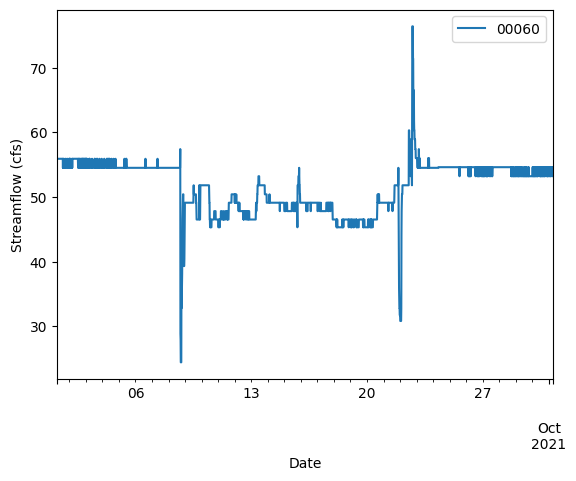

In [7]:
ax = discharge[0].plot(y='00060')
ax.set_xlabel('Date')
ax.set_ylabel('Streamflow (cfs)')

The other part of the result returned from the `get_iv()` function is a metadata object that contains information about the query that was executed to return the data. For example, you can access the URL that was assembled to retrieve the requested data from the USGS web service. The USGS web service responses contain a descriptive header that defines and can be helpful in interpreting the contents of the response.

In [8]:
print('The query URL used to retrieve the data from NWIS was: ' + discharge[1].url)

The query URL used to retrieve the data from NWIS was: https://nwis.waterservices.usgs.gov/nwis/iv/?format=json&parameterCd=00060&startDT=2021-09-01&endDT=2021-09-30&sites=10109000


### Additional Examples

#### Example 2: Get unit values for an individual site and parameter between a start and end date.

NOTE: By default, start and end date are evaluated as local time, and the result is returned with the timestamps in the local time of the monitoring site.

In [9]:
site_id = '05114000'
startDate = '2014-10-10'
endDate = '2014-10-10'

discharge2 = nwis.get_iv(sites=site_id, parameterCd=parameterCode, start=startDate, end=endDate)
print('Retrieved ' + str(len(discharge2[0])) + ' data values.')
display(discharge2[0])

Retrieved 96 data values.


,site_no,00060,00060_cd
datetime,,,
2014-10-10 05:00:00+00:00,05114000,478.0,A
2014-10-10 05:15:00+00:00,05114000,478.0,A
2014-10-10 05:30:00+00:00,05114000,478.0,A
2014-10-10 05:45:00+00:00,05114000,478.0,A
2014-10-10 06:00:00+00:00,05114000,478.0,A
...,...,...,...
2014-10-11 03:45:00+00:00,05114000,480.0,A
2014-10-11 04:00:00+00:00,05114000,480.0,A
2014-10-11 04:15:00+00:00,05114000,480.0,A


#### Example 3: Get unit values for an individual site for today

In [10]:
today = str(date.today())
discharge_today = nwis.get_iv(sites=site_id, parameterCd=parameterCode, start=today, end=today)
print('Retrieved ' + str(len(discharge_today[0])) + ' data values.')
display(discharge_today[0])

Retrieved 33 data values.


,site_no,00060,00060_cd
datetime,,,
2026-01-20 06:00:00+00:00,05114000,-999999.0,"P, Ice"
2026-01-20 06:15:00+00:00,05114000,-999999.0,"P, Ice"
2026-01-20 06:30:00+00:00,05114000,-999999.0,"P, Ice"
2026-01-20 06:45:00+00:00,05114000,-999999.0,"P, Ice"
2026-01-20 07:00:00+00:00,05114000,-999999.0,"P, Ice"
2026-01-20 07:15:00+00:00,05114000,-999999.0,"P, Ice"
2026-01-20 07:30:00+00:00,05114000,-999999.0,"P, Ice"
2026-01-20 07:45:00+00:00,05114000,-999999.0,"P, Ice"
2026-01-20 08:00:00+00:00,05114000,-999999.0,"P, Ice"


#### Example 4: Retrieve data using UTC times

NOTE: Adding 'Z' to the input time parameters indicates that they are in UTC rather than local time. The time stamps associated with the data returned are still in the local time of the USGS monitoring site.

In [11]:
discharge_UTC = nwis.get_iv(sites=site_id, parameterCd=parameterCode,
                            start='2014-10-10T00:00Z', end='2014-10-10T23:59Z')
print('Retrieved ' + str(len(discharge_UTC[0])) + ' data values.')
display(discharge_UTC[0])

Retrieved 96 data values.


,site_no,00060,00060_cd
datetime,,,
2014-10-09 23:00:00+00:00,05114000,481.0,A
2014-10-09 23:15:00+00:00,05114000,481.0,A
2014-10-09 23:30:00+00:00,05114000,481.0,A
2014-10-09 23:45:00+00:00,05114000,481.0,A
2014-10-10 00:00:00+00:00,05114000,481.0,A
...,...,...,...
2014-10-10 21:45:00+00:00,05114000,478.0,A
2014-10-10 22:00:00+00:00,05114000,478.0,A
2014-10-10 22:15:00+00:00,05114000,478.0,A


#### Example 5: Get unit values for two sites, for a single parameter, between a start and end date

In [12]:
discharge_multisite = nwis.get_iv(sites=['04024430', '04024000'], parameterCd=parameterCode,
                                  start='2013-10-01', end='2013-10-01')
print('Retrieved ' + str(len(discharge_multisite[0])) + ' data values.')
display(discharge_multisite[0])

Retrieved 192 data values.


00060 00060_cd
site_no  datetime                                 
04024000 2013-10-01 05:00:00+00:00  567.0        A
         2013-10-01 05:15:00+00:00  567.0        A
         2013-10-01 05:30:00+00:00  567.0        A
         2013-10-01 05:45:00+00:00  567.0        A
         2013-10-01 06:00:00+00:00  567.0        A
...                                   ...      ...
04024430 2013-10-02 03:45:00+00:00   59.5        A
         2013-10-02 04:00:00+00:00   59.5        A
         2013-10-02 04:15:00+00:00   59.5        A
         2013-10-02 04:30:00+00:00   59.5        A
         2013-10-02 04:45:00+00:00   59.5        A

[192 rows x 2 columns]

The following example is the same as the previous example but with multi index turned off (multi_index=False)

In [13]:
discharge_multisite = nwis.get_iv(sites=['04024430', '04024000'], parameterCd=parameterCode,
                                  start='2013-10-01', end='2013-10-01', multi_index=False)
print('Retrieved ' + str(len(discharge_multisite[0])) + ' data values.')
display(discharge_multisite[0])

Retrieved 192 data values.


,site_no,00060,00060_cd
datetime,,,
2013-10-01 05:00:00+00:00,04024000,567.0,A
2013-10-01 05:00:00+00:00,04024430,61.3,A
2013-10-01 05:15:00+00:00,04024430,60.4,A
2013-10-01 05:15:00+00:00,04024000,567.0,A
2013-10-01 05:30:00+00:00,04024430,60.4,A
...,...,...,...
2013-10-02 04:15:00+00:00,04024000,592.0,A
2013-10-02 04:30:00+00:00,04024430,59.5,A
2013-10-02 04:30:00+00:00,04024000,592.0,A
